# FuzzyNetwork Demo - Iris Dataset

Demonstrate multi-class classification with FuzzyNewtwork on classic Iris dataset.

In [1]:
import sys
sys.path.append("../../src")

In [2]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sofenn import FuzzyNetwork

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

## 1) Load and Preprocess Data
Load Iris dataset and create X/y train/test datasets.

In [3]:
iris = datasets.load_iris()

# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

# preview datasets
print(f"X_train preview: \n{X_train[:5]}")
print(f"\ny_train preview: \n{y_train[:5]}")

X_train preview: 
[[7.9 3.8 6.4 2. ]
 [7.  3.2 4.7 1.4]
 [5.  3.5 1.6 0.6]
 [7.3 2.9 6.3 1.8]
 [5.1 3.8 1.5 0.3]]

y_train preview: 
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


## 2) Train FuzzyNetwork
Create FuzzyNetwork model and train on Iris data.

In [4]:
fuzz = FuzzyNetwork(
            features=4,
            neurons=3,            
            problem_type='classification', 
            target_classes=3
)
# X_train.shape = (135, 4)

In [5]:
fuzz.compile()
fuzz.summary()

Model: "FuzzyNetwork Summary"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ InputRow (InputLayer)         │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ FuzzyRules (FuzzyLayer)       │ (None, 3)                 │              24 │ InputRow[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Normalize (NormalizeLayer)    │ (None, 3)                 │               0 │ FuzzyRules[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Weights (WeightedLayer)       │ (None, 3)                 │              15 │ InputRow[0][0],            │
│                               │                           │                 │ Normalize[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Outputs (OutputLayer)         │ (None, 1)                 │               0 │ Weights[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Softmax (Dense)               │ (None, 3)                 │               6 │ Outputs[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 45 (180.00 B)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs=100
batch_size=32

fuzz.fit(X_train, y_train, 
         epochs=epochs, verbose=1, batch_size=batch_size)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.3966 - loss: 10.5464
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3374 - loss: 10.5377
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3257 - loss: 10.5427
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3122 - loss: 10.5408  
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3370 - loss: 10.5193  
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3647 - loss: 10.5013  
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3339 - loss: 10.5140  
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3752 - loss: 10.4737
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3630 - loss: 10.4702
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.3266 - loss: 10.5112  
Epoch 11/100
5/5 ━━━━━━━━━━━━

## 3) Evaluate Predictions

Calculate accuracy on holdout samples.

In [7]:
y_pred = fuzz.predict(X_test)
y_pred[:5].round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [8]:
acc = y_test == y_pred.round()
acc[:5]

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [9]:
acc.sum() / acc.size

0.8666666666666667

Calculate binary accuracy on holdout sample.

In [10]:
pred_loss, pred_bin_acc = fuzz.evaluate(X_test, y_test)
print(f'Model Loss: {pred_loss: 0.8f}')
print(f'Binary Accuracy: {100 * pred_bin_acc: 2.1f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - categorical_accuracy: 0.7333 - loss: 2.2060
Model Loss:  2.20603466
Binary Accuracy:  73.3%


## 4) Plot Results

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

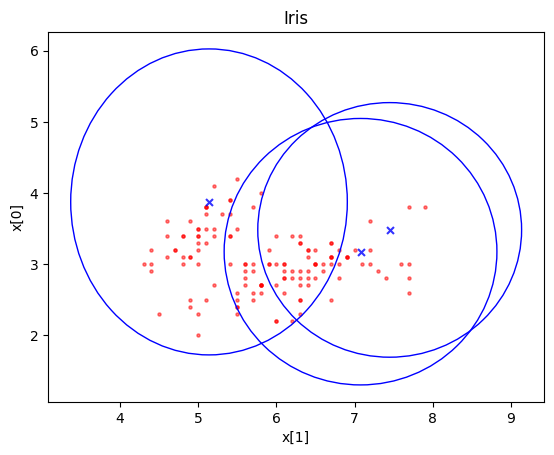

In [12]:
w = fuzz.get_layer("FuzzyRules").get_weights()


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], color='r', alpha=0.5, s=5)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], color='b', alpha=0.8, s=25, marker='x')
plt.show()